In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
confirmed_data = pd.read_csv("C:/Users/jmarshall/downloads/datasets_494724_1196190_time_series_covid_19_confirmed.csv")
death_data = pd.read_csv("C:/Users/jmarshall/downloads/datasets_494724_1196190_time_series_covid_19_deaths.csv")

In [4]:
confirmed_data.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,7653,8145,8676,9216,9998,10582,11173,11831,12456,13036
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,949,964,969,981,989,998,1004,1029,1050,1076
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,7377,7542,7728,7918,8113,8306,8503,8697,8857,8997
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,761,762,762,762,762,762,763,763,763,763
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,52,52,58,60,61,69,70,70,71,74


In [5]:
death_data.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,178,187,193,205,216,218,219,220,227,235
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,31,31,31,31,31,32,32,33,33,33
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,561,568,575,582,592,600,609,617,623,630
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,3,3,3,3,4,4,4,4,4,4


In [6]:
confirmed_data["Province/State"].unique()

array([nan, 'Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia', 'Alberta', 'British Columbia',
       'Grand Princess', 'Manitoba', 'New Brunswick',
       'Newfoundland and Labrador', 'Nova Scotia', 'Ontario',
       'Prince Edward Island', 'Quebec', 'Saskatchewan', 'Anhui',
       'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong', 'Guangxi',
       'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan', 'Hong Kong',
       'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu', 'Jiangxi', 'Jilin',
       'Liaoning', 'Macau', 'Ningxia', 'Qinghai', 'Shaanxi', 'Shandong',
       'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin', 'Tibet', 'Xinjiang',
       'Yunnan', 'Zhejiang', 'Faroe Islands', 'Greenland',
       'French Guiana', 'French Polynesia', 'Guadeloupe', 'Mayotte',
       'New Caledonia', 'Reunion', 'Saint Barthelemy', 'St Martin',
       'Martinique', 'Aruba', 'Curacao', 'Sint

In [7]:
confirmed_data["Province/State"].fillna("", inplace=True)
death_data["Province/State"].fillna("", inplace=True)

In [8]:
confirmed_data.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20
0,,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,7653,8145,8676,9216,9998,10582,11173,11831,12456,13036
1,,Albania,41.1533,20.1683,0,0,0,0,0,0,...,949,964,969,981,989,998,1004,1029,1050,1076
2,,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,7377,7542,7728,7918,8113,8306,8503,8697,8857,8997
3,,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,761,762,762,762,762,762,763,763,763,763
4,,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,52,52,58,60,61,69,70,70,71,74


In [9]:
death_data.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20
0,,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,178,187,193,205,216,218,219,220,227,235
1,,Albania,41.1533,20.1683,0,0,0,0,0,0,...,31,31,31,31,31,32,32,33,33,33
2,,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,561,568,575,582,592,600,609,617,623,630
3,,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51
4,,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,3,3,3,3,4,4,4,4,4,4


In [10]:
confirmed_data["Country - State"] = confirmed_data[["Country/Region", "Province/State"]].apply(lambda x: ' - '.join(x), axis=1)
death_data["Country - State"] = death_data[["Country/Region", "Province/State"]].apply(lambda x: ' - '.join(x), axis=1)

In [11]:
confirmed_data.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,Country - State
0,,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,8145,8676,9216,9998,10582,11173,11831,12456,13036,Afghanistan -
1,,Albania,41.1533,20.1683,0,0,0,0,0,0,...,964,969,981,989,998,1004,1029,1050,1076,Albania -
2,,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,7542,7728,7918,8113,8306,8503,8697,8857,8997,Algeria -
3,,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,762,762,762,762,762,763,763,763,763,Andorra -
4,,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,52,58,60,61,69,70,70,71,74,Angola -


In [12]:
death_data.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,Country - State
0,,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,187,193,205,216,218,219,220,227,235,Afghanistan -
1,,Albania,41.1533,20.1683,0,0,0,0,0,0,...,31,31,31,31,32,32,33,33,33,Albania -
2,,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,568,575,582,592,600,609,617,623,630,Algeria -
3,,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,Andorra -
4,,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,3,3,3,4,4,4,4,4,4,Angola -


In [13]:
death_data.drop(["Province/State", "Country/Region"], axis=1, inplace=True)

In [14]:
confirmed_data.drop(["Province/State", "Country/Region"], axis=1, inplace=True)

In [15]:
WuhanLat = 30.5928/(180/math.pi)
WuhanLong = 114.3055/(180/math.pi)
countriesLat = confirmed_data["Lat"]
countriesLong = confirmed_data["Long"]

In [16]:
type(countriesLat)

pandas.core.series.Series

In [17]:
countriesLat.dtype

dtype('float64')

In [18]:
confirmed_data["Distance"] = 3963.0*np.arccos((np.sin(WuhanLat)*np.sin(countriesLat)) + np.cos(WuhanLat)*np.cos(countriesLat)*np.cos(countriesLong-WuhanLong))

In [19]:
confirmed_data.tail(5)

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,Country - State,Distance
261,0.186360,6.613081,0,0,0,0,0,0,0,0,...,251,251,251,251,299,441,443,458,Sao Tome and Principe -,6167.071029
262,15.552727,48.516388,0,0,0,0,0,0,0,0,...,197,209,212,222,233,249,256,278,Yemen -,2683.356337
263,-11.645500,43.333300,0,0,0,0,0,0,0,0,...,34,78,78,87,87,87,87,87,Comoros -,6433.436756
264,38.861034,71.276093,0,0,0,0,0,0,0,0,...,2350,2551,2738,2929,3100,3266,3424,3563,Tajikistan -,2520.252167
265,-29.609988,28.233608,0,0,0,0,0,0,0,0,...,1,2,2,2,2,2,2,2,Lesotho -,4572.546700


In [20]:
death_data["Distance"] = 3963.0*np.arccos((np.sin(WuhanLat)*np.sin(countriesLat)) + np.cos(WuhanLat)*np.cos(countriesLat)*np.cos(countriesLong-WuhanLong))

In [21]:
death_data.dtypes

Lat                float64
Long               float64
1/22/20              int64
1/23/20              int64
1/24/20              int64
1/25/20              int64
1/26/20              int64
1/27/20              int64
1/28/20              int64
1/29/20              int64
1/30/20              int64
1/31/20              int64
2/1/20               int64
2/2/20               int64
2/3/20               int64
2/4/20               int64
2/5/20               int64
2/6/20               int64
2/7/20               int64
2/8/20               int64
2/9/20               int64
2/10/20              int64
2/11/20              int64
2/12/20              int64
2/13/20              int64
2/14/20              int64
2/15/20              int64
2/16/20              int64
2/17/20              int64
2/18/20              int64
                    ...   
5/1/20               int64
5/2/20               int64
5/3/20               int64
5/4/20               int64
5/5/20               int64
5/6/20               int64
5

In [22]:
test_series = death_data["Country - State"].astype('category')

In [23]:
test_series

0                                      Afghanistan - 
1                                          Albania - 
2                                          Algeria - 
3                                          Andorra - 
4                                           Angola - 
5                              Antigua and Barbuda - 
6                                        Argentina - 
7                                          Armenia - 
8            Australia - Australian Capital Territory
9                         Australia - New South Wales
10                     Australia - Northern Territory
11                             Australia - Queensland
12                        Australia - South Australia
13                               Australia - Tasmania
14                               Australia - Victoria
15                      Australia - Western Australia
16                                         Austria - 
17                                      Azerbaijan - 
18                          

In [24]:
death_data["Country - State"] = death_data["Country - State"].astype('category')

In [25]:
confirmed_data["Country - State"] = confirmed_data["Country - State"].astype('category')

In [26]:
death_data.index

RangeIndex(start=0, stop=266, step=1)

In [27]:
confirmed_data.index

RangeIndex(start=0, stop=266, step=1)

In [28]:
confirmed_data.iloc[0:5,0:5]

,Lat,Long,1/22/20,1/23/20,1/24/20
0,33.0000,65.0000,0,0,0
1,41.1533,20.1683,0,0,0
2,28.0339,1.6596,0,0,0
3,42.5063,1.5218,0,0,0
4,-11.2027,17.8739,0,0,0


In [29]:
confirmed_data.head(5)

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,Country - State,Distance
0,33.0000,65.0000,0,0,0,0,0,0,0,0,...,8676,9216,9998,10582,11173,11831,12456,13036,Afghanistan -,4160.878100
1,41.1533,20.1683,0,0,0,0,0,0,0,0,...,969,981,989,998,1004,1029,1050,1076,Albania -,9869.276834
2,28.0339,1.6596,0,0,0,0,0,0,0,0,...,7728,7918,8113,8306,8503,8697,8857,8997,Algeria -,9125.498645
3,42.5063,1.5218,0,0,0,0,0,0,0,0,...,762,762,762,762,763,763,763,763,Andorra -,8004.697489
4,-11.2027,17.8739,0,0,0,0,0,0,0,0,...,58,60,61,69,70,70,71,74,Angola -,4919.080767


In [30]:
test_df = confirmed_data
test_df.set_index("Country - State", inplace=True)
test_df.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,Distance
Country - State,,,,,,,,,,,,,,,,,,,,,
Afghanistan -,33.0000,65.0000,0,0,0,0,0,0,0,0,...,8145,8676,9216,9998,10582,11173,11831,12456,13036,4160.878100
Albania -,41.1533,20.1683,0,0,0,0,0,0,0,0,...,964,969,981,989,998,1004,1029,1050,1076,9869.276834
Algeria -,28.0339,1.6596,0,0,0,0,0,0,0,0,...,7542,7728,7918,8113,8306,8503,8697,8857,8997,9125.498645
Andorra -,42.5063,1.5218,0,0,0,0,0,0,0,0,...,762,762,762,762,762,763,763,763,763,8004.697489
Angola -,-11.2027,17.8739,0,0,0,0,0,0,0,0,...,52,58,60,61,69,70,70,71,74,4919.080767


In [31]:
test_df.index

CategoricalIndex(['Afghanistan - ', 'Albania - ', 'Algeria - ', 'Andorra - ',
                  'Angola - ', 'Antigua and Barbuda - ', 'Argentina - ',
                  'Armenia - ', 'Australia - Australian Capital Territory',
                  'Australia - New South Wales',
                  ...
                  'Malawi - ', 'United Kingdom - Falkland Islands (Malvinas)',
                  'France - Saint Pierre and Miquelon', 'South Sudan - ',
                  'Western Sahara - ', 'Sao Tome and Principe - ', 'Yemen - ',
                  'Comoros - ', 'Tajikistan - ', 'Lesotho - '],
                 categories=['Afghanistan - ', 'Albania - ', 'Algeria - ', 'Andorra - ', 'Angola - ', 'Antigua and Barbuda - ', 'Argentina - ', 'Armenia - ', ...], ordered=False, name='Country - State', dtype='category', length=266)

In [32]:
test_df.loc["Afghanistan - "]

Lat            33.0000
Long           65.0000
1/22/20         0.0000
1/23/20         0.0000
1/24/20         0.0000
1/25/20         0.0000
1/26/20         0.0000
1/27/20         0.0000
1/28/20         0.0000
1/29/20         0.0000
1/30/20         0.0000
1/31/20         0.0000
2/1/20          0.0000
2/2/20          0.0000
2/3/20          0.0000
2/4/20          0.0000
2/5/20          0.0000
2/6/20          0.0000
2/7/20          0.0000
2/8/20          0.0000
2/9/20          0.0000
2/10/20         0.0000
2/11/20         0.0000
2/12/20         0.0000
2/13/20         0.0000
2/14/20         0.0000
2/15/20         0.0000
2/16/20         0.0000
2/17/20         0.0000
2/18/20         0.0000
               ...    
4/30/20      2171.0000
5/1/20       2335.0000
5/2/20       2469.0000
5/3/20       2704.0000
5/4/20       2894.0000
5/5/20       3224.0000
5/6/20       3392.0000
5/7/20       3563.0000
5/8/20       3778.0000
5/9/20       4033.0000
5/10/20      4402.0000
5/11/20      4687.0000
5/12/20    

In [33]:
test_df.drop(['Lat', 'Long'], axis=1, inplace=True)

In [34]:
test_df.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,Distance
Country - State,,,,,,,,,,,,,,,,,,,,,
Afghanistan -,0,0,0,0,0,0,0,0,0,0,...,8145,8676,9216,9998,10582,11173,11831,12456,13036,4160.878100
Albania -,0,0,0,0,0,0,0,0,0,0,...,964,969,981,989,998,1004,1029,1050,1076,9869.276834
Algeria -,0,0,0,0,0,0,0,0,0,0,...,7542,7728,7918,8113,8306,8503,8697,8857,8997,9125.498645
Andorra -,0,0,0,0,0,0,0,0,0,0,...,762,762,762,762,762,763,763,763,763,8004.697489
Angola -,0,0,0,0,0,0,0,0,0,0,...,52,58,60,61,69,70,70,71,74,4919.080767


In [35]:
plain_df = test_df.drop(["Distance"], axis=1)

In [36]:
test_case = plain_df.loc['Afghanistan - ']

In [37]:
test_case.head()

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    0
Name: Afghanistan - , dtype: int64

In [38]:
test_case.shape

(128,)

In [39]:
test_case.index

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '5/19/20', '5/20/20', '5/21/20', '5/22/20', '5/23/20', '5/24/20',
       '5/25/20', '5/26/20', '5/27/20', '5/28/20'],
      dtype='object', length=128)

In [41]:
plain_df.index

CategoricalIndex(['Afghanistan - ', 'Albania - ', 'Algeria - ', 'Andorra - ',
                  'Angola - ', 'Antigua and Barbuda - ', 'Argentina - ',
                  'Armenia - ', 'Australia - Australian Capital Territory',
                  'Australia - New South Wales',
                  ...
                  'Malawi - ', 'United Kingdom - Falkland Islands (Malvinas)',
                  'France - Saint Pierre and Miquelon', 'South Sudan - ',
                  'Western Sahara - ', 'Sao Tome and Principe - ', 'Yemen - ',
                  'Comoros - ', 'Tajikistan - ', 'Lesotho - '],
                 categories=['Afghanistan - ', 'Albania - ', 'Algeria - ', 'Andorra - ', 'Angola - ', 'Antigua and Barbuda - ', 'Argentina - ', 'Armenia - ', ...], ordered=False, name='Country - State', dtype='category', length=266)

In [143]:
plain_df.loc["US - "]

1/22/20          1
1/23/20          1
1/24/20          2
1/25/20          2
1/26/20          5
1/27/20          5
1/28/20          5
1/29/20          5
1/30/20          5
1/31/20          7
2/1/20           8
2/2/20           8
2/3/20          11
2/4/20          11
2/5/20          11
2/6/20          11
2/7/20          11
2/8/20          11
2/9/20          11
2/10/20         11
2/11/20         12
2/12/20         12
2/13/20         13
2/14/20         13
2/15/20         13
2/16/20         13
2/17/20         13
2/18/20         13
2/19/20         13
2/20/20         13
            ...   
4/29/20    1039909
4/30/20    1069424
5/1/20     1103461
5/2/20     1132539
5/3/20     1158040
5/4/20     1180375
5/5/20     1204351
5/6/20     1229331
5/7/20     1257023
5/8/20     1283929
5/9/20     1309550
5/10/20    1329260
5/11/20    1347881
5/12/20    1369376
5/13/20    1390406
5/14/20    1417774
5/15/20    1442824
5/16/20    1467820
5/17/20    1486757
5/18/20    1508308
5/19/20    1528568
5/20/20    1

In [144]:
data = plain_df.loc["US - "]

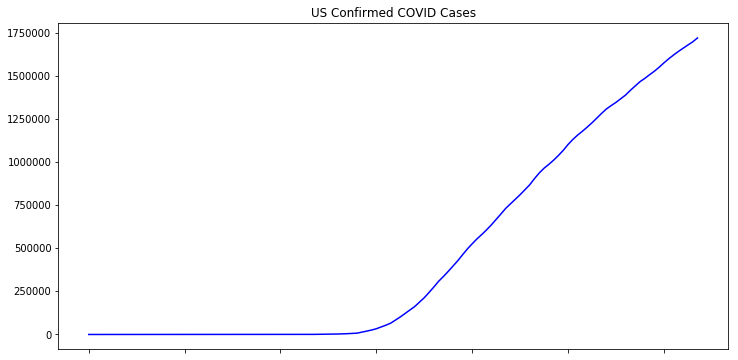

In [145]:
plt.figure(figsize=(12,6))
data.plot(title="US Confirmed COVID Cases", color = 'blue')
plt.show()

In [146]:
data.index

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '5/19/20', '5/20/20', '5/21/20', '5/22/20', '5/23/20', '5/24/20',
       '5/25/20', '5/26/20', '5/27/20', '5/28/20'],
      dtype='object', length=128)

In [147]:
pd.to_datetime(data.index)

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2020-05-19', '2020-05-20', '2020-05-21', '2020-05-22',
               '2020-05-23', '2020-05-24', '2020-05-25', '2020-05-26',
               '2020-05-27', '2020-05-28'],
              dtype='datetime64[ns]', length=128, freq=None)

In [148]:
data.index

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '5/19/20', '5/20/20', '5/21/20', '5/22/20', '5/23/20', '5/24/20',
       '5/25/20', '5/26/20', '5/27/20', '5/28/20'],
      dtype='object', length=128)

In [149]:
data.index = pd.to_datetime(data.index)

In [150]:
weekly = data.resample("W").mean()

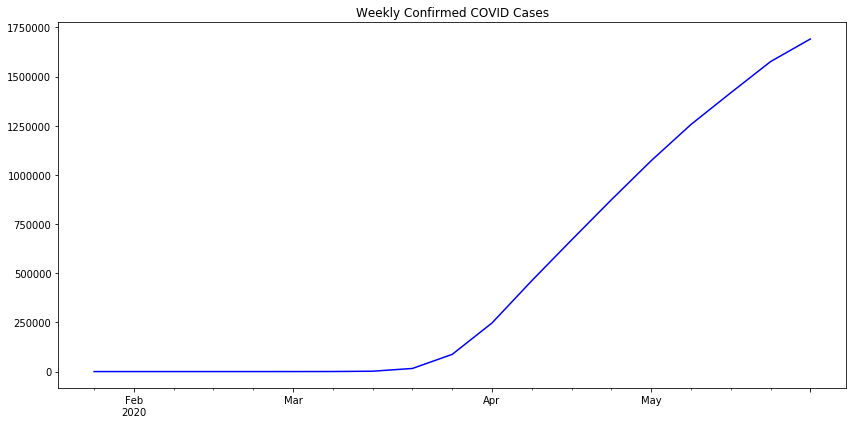

In [151]:
plt.figure(figsize=(12,6))
weekly.plot(title="Weekly Confirmed COVID Cases", color = 'blue')
plt.tight_layout()
plt.show()

In [152]:
weekly
type(weekly)
summary = data.describe()

In [153]:
summary = summary.transpose()
summary.head()

count       128.000000
mean     472810.125000
std      588694.078881
min           1.000000
25%          15.000000
Name: US - , dtype: float64

In [154]:
def create_training_series(complete_time_series, prediction_length):
    time_series_training = []
    observations = complete_time_series.shape[0]
    #complete_time_series = complete_time_series.tolist()
    for ts in range(1,int(observations/prediction_length)):
        time_series_training.append(complete_time_series.iloc[ts:ts-prediction_length])
        
    return time_series_training

In [155]:
prediction_length = 2

time_series_training = create_training_series(data, prediction_length)

In [156]:
len(time_series_training)

63

In [100]:
def series_to_json_obj(ts):
    json_obj = {"start": str(ts.index[0]), "target": list(ts)}
    return json_obj

In [105]:
ts = time_series_training[0]

2020-01-23          1
2020-01-24          2
2020-01-25          2
2020-01-26          5
2020-01-27          5
2020-01-28          5
2020-01-29          5
2020-01-30          5
2020-01-31          7
2020-02-01          8
2020-02-02          8
2020-02-03         11
2020-02-04         11
2020-02-05         11
2020-02-06         11
2020-02-07         11
2020-02-08         11
2020-02-09         11
2020-02-10         11
2020-02-11         12
2020-02-12         12
2020-02-13         13
2020-02-14         13
2020-02-15         13
2020-02-16         13
2020-02-17         13
2020-02-18         13
2020-02-19         13
2020-02-20         13
2020-02-21         15
               ...   
2020-04-28    1012582
2020-04-29    1039909
2020-04-30    1069424
2020-05-01    1103461
2020-05-02    1132539
2020-05-03    1158040
2020-05-04    1180375
2020-05-05    1204351
2020-05-06    1229331
2020-05-07    1257023
2020-05-08    1283929
2020-05-09    1309550
2020-05-10    1329260
2020-05-11    1347881
2020-05-12

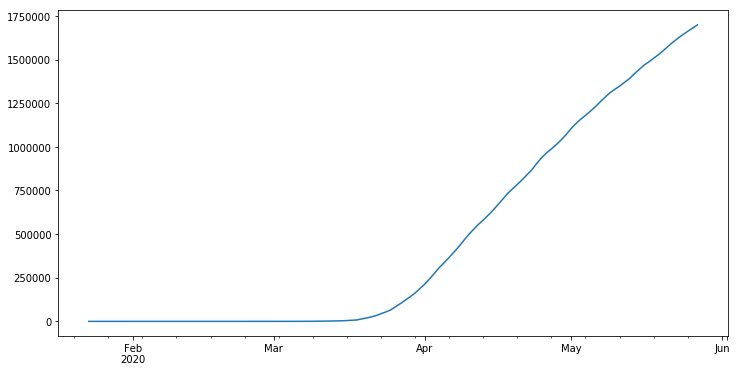

In [162]:
print(ts)
print(type(ts))
plt.figure(figsize=(12,6))
time_series_training[0].plot()
plt.show()

In [157]:
json_obj = series_to_json_obj(ts)

In [158]:
json_obj

{'start': '2020-01-23 00:00:00',
 'target': [1,
  2,
  2,
  5,
  5,
  5,
  5,
  5,
  7,
  8,
  8,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  12,
  12,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  15,
  15,
  15,
  51,
  51,
  57,
  58,
  60,
  68,
  74,
  98,
  118,
  149,
  219,
  267,
  403,
  519,
  588,
  962,
  1285,
  1667,
  2181,
  2729,
  3536,
  4661,
  6437,
  7781,
  13748,
  19274,
  25600,
  33280,
  43862,
  53925,
  65844,
  83836,
  101962,
  121786,
  140910,
  162147,
  188172,
  213602,
  244008,
  275798,
  309027,
  336802,
  366317,
  397121,
  428654,
  463327,
  496846,
  526776,
  555313,
  580624,
  607670,
  636674,
  667981,
  700062,
  732590,
  758809,
  784708,
  811865,
  840351,
  869170,
  905358,
  938154,
  965785,
  988197,
  1012582,
  1039909,
  1069424,
  1103461,
  1132539,
  1158040,
  1180375,
  1204351,
  1229331,
  1257023,
  1283929,
  1309550,
  1329260,
  1347881,
  1369376,
  1390406,
  1417774,
  1442824,
  1467820,
  14867

In [108]:
import json
import os

def write_json_dataset(time_series, filename):
    with open(filename, 'wb') as f:
        
        for ts in time_series:
            json_line = json.dumps(series_to_json_obj(ts)) + '\n'
            json_line = json_line.encode('utf-8')
            f.write(json_line)
            
    print(filename + 'saved.')

In [110]:
data_dir = 'json_energy_data'

if not os.path.exists(data_dir):
    os.makedirs(data_dir)

In [117]:
train_key = os.path.join(data_dir, 'train.json')
test_key = os.path.join(data_dir, 'test.json')

#write_json_dataset(time_series_training, train_key)
#write_json_dataset(data, test_key)

In [136]:
write_json_dataset(time_series_training, train_key)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [137]:
write_json_dataset(data, test_key)

AttributeError: 'int' object has no attribute 'index'

In [140]:
type(data)
data.index
data.index[0]

Timestamp('2020-01-22 00:00:00')

In [128]:
time_series_training[0]
type(time_series_training[0])
print(time_series_training.index)
time_series_training[0].index

<built-in method index of list object at 0x000000000FA45B48>


DatetimeIndex(['2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26',
               '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30',
               '2020-01-31', '2020-02-01',
               ...
               '2020-05-18', '2020-05-19', '2020-05-20', '2020-05-21',
               '2020-05-22', '2020-05-23', '2020-05-24', '2020-05-25',
               '2020-05-26', '2020-05-27'],
              dtype='datetime64[ns]', length=126, freq=None)

In [134]:
ts_lists = []
for i in time_series_training:
    print(i.head())
    ts_lists.append(i.tolist())

2020-01-23    1
2020-01-24    2
2020-01-25    2
2020-01-26    5
2020-01-27    5
Name: US - , dtype: int64
Series([], Name: US - , dtype: int64)
Series([], Name: US - , dtype: int64)
Series([], Name: US - , dtype: int64)
Series([], Name: US - , dtype: int64)
Series([], Name: US - , dtype: int64)
Series([], Name: US - , dtype: int64)
Series([], Name: US - , dtype: int64)
Series([], Name: US - , dtype: int64)
Series([], Name: US - , dtype: int64)
Series([], Name: US - , dtype: int64)
Series([], Name: US - , dtype: int64)
Series([], Name: US - , dtype: int64)
Series([], Name: US - , dtype: int64)
Series([], Name: US - , dtype: int64)
Series([], Name: US - , dtype: int64)
Series([], Name: US - , dtype: int64)
Series([], Name: US - , dtype: int64)
Series([], Name: US - , dtype: int64)
Series([], Name: US - , dtype: int64)
Series([], Name: US - , dtype: int64)
Series([], Name: US - , dtype: int64)
Series([], Name: US - , dtype: int64)
Series([], Name: US - , dtype: int64)
Series([], Name: US 

In [135]:
write_json_dataset(ts_lists, train_key)

TypeError: 'builtin_function_or_method' object is not subscriptable

In [141]:
data.rolling(2, win_type='triang').sum()

2020-01-22          NaN
2020-01-23          1.0
2020-01-24          1.5
2020-01-25          2.0
2020-01-26          3.5
2020-01-27          5.0
2020-01-28          5.0
2020-01-29          5.0
2020-01-30          5.0
2020-01-31          6.0
2020-02-01          7.5
2020-02-02          8.0
2020-02-03          9.5
2020-02-04         11.0
2020-02-05         11.0
2020-02-06         11.0
2020-02-07         11.0
2020-02-08         11.0
2020-02-09         11.0
2020-02-10         11.0
2020-02-11         11.5
2020-02-12         12.0
2020-02-13         12.5
2020-02-14         13.0
2020-02-15         13.0
2020-02-16         13.0
2020-02-17         13.0
2020-02-18         13.0
2020-02-19         13.0
2020-02-20         13.0
                ...    
2020-04-29    1026245.5
2020-04-30    1054666.5
2020-05-01    1086442.5
2020-05-02    1118000.0
2020-05-03    1145289.5
2020-05-04    1169207.5
2020-05-05    1192363.0
2020-05-06    1216841.0
2020-05-07    1243177.0
2020-05-08    1270476.0
2020-05-09    12

In [142]:
data.head()

2020-01-22    1
2020-01-23    1
2020-01-24    2
2020-01-25    2
2020-01-26    5
Name: US - , dtype: int64

In [163]:
data.head()

2020-01-22    1
2020-01-23    1
2020-01-24    2
2020-01-25    2
2020-01-26    5
Name: US - , dtype: int64

In [171]:
# Create Differential to show new cases instead of accumulating old ones
differential = pd.DataFrame(data.iloc[:-1])

for i in range(1, data.shape[0]):
    differential.iloc[i-1] = data.iloc[i] - data.iloc[i-1]

In [172]:
type(differential)

pandas.core.frame.DataFrame

In [173]:
differential

,US -
2020-01-22,0
2020-01-23,1
2020-01-24,0
2020-01-25,3
2020-01-26,0
2020-01-27,0
2020-01-28,0
2020-01-29,0
2020-01-30,2
2020-01-31,1


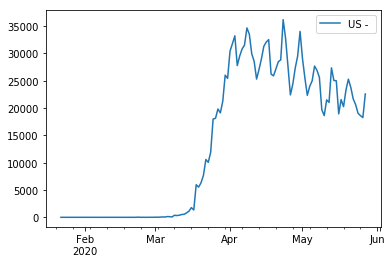

In [174]:
differential.plot()
plt.show()

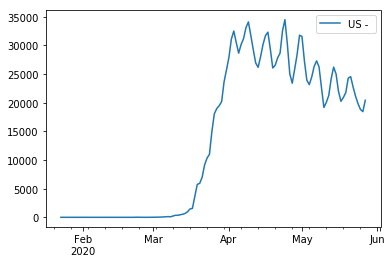

In [181]:
rolling_two_day = differential.rolling(2).mean()
rolling_two_day.plot()
plt.show()

In [182]:
five_day = differential.rolling(5).mean()

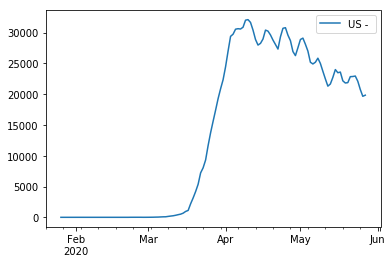

In [183]:
five_day.plot()
plt.show()

In [191]:
weekly_differenced = pd.DataFrame(differential.iloc[:-7])

for i in range(7, differential.shape[0]):
    weekly_differenced.iloc[i-7] = differential.iloc[i] - differential.iloc[i-7]

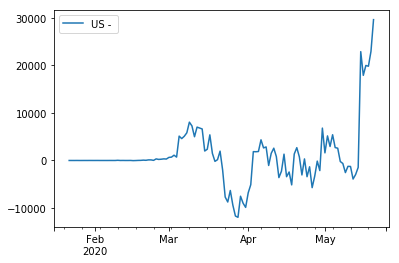

In [192]:
weekly_differenced.plot()
plt.show()

In [193]:
meta_difference = pd.DataFrame(differential.iloc[:-1])

for i in range(1, differential.shape[0]):
    meta_difference.iloc[i-1] = differential.iloc[i] - differential.iloc[i-1]

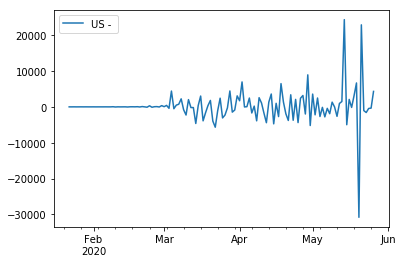

In [194]:
meta_difference.plot()
plt.show()

In [195]:
true_weekly_differenced = pd.DataFrame(data.iloc[:-7])

for i in range(7, data.shape[0]):
    true_weekly_differenced.iloc[i-7] = data.iloc[i] - data.iloc[i-7]

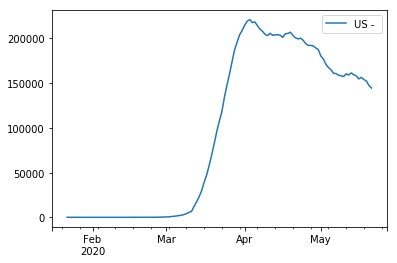

In [196]:
true_weekly_differenced.plot()
plt.show()

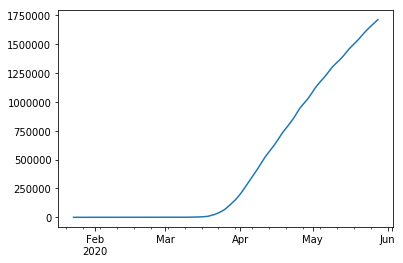

In [200]:
data.rolling(2, win_type='triang').mean().plot()
plt.show()

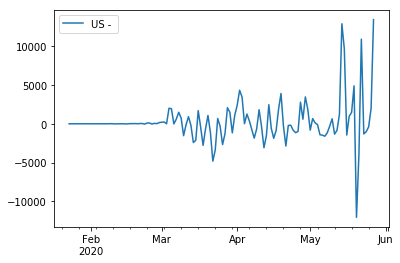

In [201]:
differential.rolling(2, win_type='triang').mean().plot()

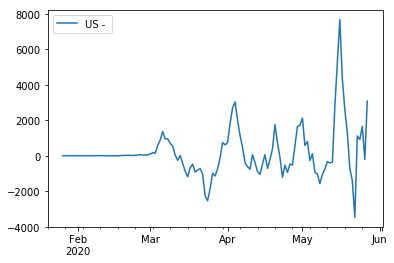

In [202]:
differential.rolling(5, win_type='triang').mean().plot()

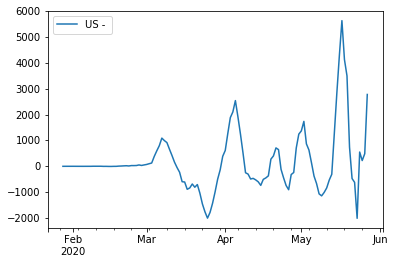

In [203]:
differential.rolling(7, win_type='triang').mean().plot()

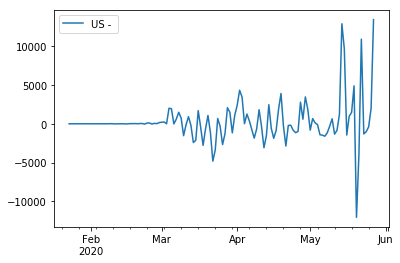

In [208]:
differential.rolling(2, win_type='gaussian').mean(std=100.1).plot()

In [206]:
summary.transpose()

count    1.280000e+02
mean     4.728101e+05
std      5.886941e+05
min      1.000000e+00
25%      1.500000e+01
50%      7.484000e+04
75%      9.713880e+05
max      1.721753e+06
Name: US - , dtype: float64

In [209]:
summary.index

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [210]:
summary.std

<bound method Series.std of count    1.280000e+02
mean     4.728101e+05
std      5.886941e+05
min      1.000000e+00
25%      1.500000e+01
50%      7.484000e+04
75%      9.713880e+05
max      1.721753e+06
Name: US - , dtype: float64>

In [211]:
summary['std']

588694.0788811289

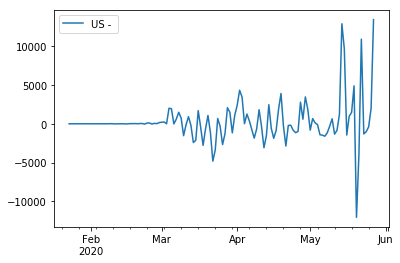

In [212]:
differential.rolling(2, win_type='gaussian').mean(std=summary['std']).plot()

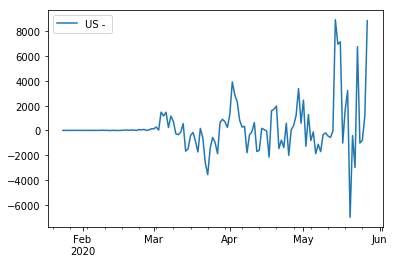

In [213]:
differential.rolling(3, win_type='gaussian').mean(std=summary['std']).plot()

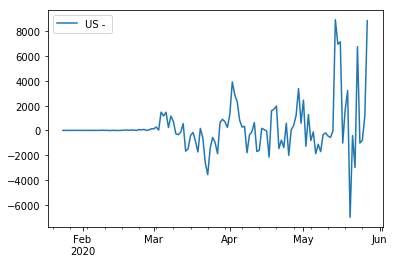

In [214]:
differential.rolling(3, win_type='gaussian').mean(std=summary['std']).plot()

In [215]:
differential.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 127 entries, 2020-01-22 to 2020-05-27
Data columns (total 1 columns):
US -     127 non-null int64
dtypes: int64(1)
memory usage: 2.0 KB


In [216]:
diff_summary = differential.describe().transpose()

In [217]:
diff_summary

,count,mean,std,min,25%,50%,75%,max
US -,127.0,355.543307,5117.073767,-30821.0,-833.5,0.0,1196.0,24338.0


In [219]:
summary.transpose()

count    1.280000e+02
mean     4.728101e+05
std      5.886941e+05
min      1.000000e+00
25%      1.500000e+01
50%      7.484000e+04
75%      9.713880e+05
max      1.721753e+06
Name: US - , dtype: float64

In [220]:
summary.transpose()

count    1.280000e+02
mean     4.728101e+05
std      5.886941e+05
min      1.000000e+00
25%      1.500000e+01
50%      7.484000e+04
75%      9.713880e+05
max      1.721753e+06
Name: US - , dtype: float64

In [221]:
summary

count    1.280000e+02
mean     4.728101e+05
std      5.886941e+05
min      1.000000e+00
25%      1.500000e+01
50%      7.484000e+04
75%      9.713880e+05
max      1.721753e+06
Name: US - , dtype: float64

In [223]:
data.describe().transpose()

count    1.280000e+02
mean     4.728101e+05
std      5.886941e+05
min      1.000000e+00
25%      1.500000e+01
50%      7.484000e+04
75%      9.713880e+05
max      1.721753e+06
Name: US - , dtype: float64

In [224]:
type(diff_summary)

pandas.core.frame.DataFrame

In [226]:
type(summary)

pandas.core.series.Series

In [227]:
summary = pd.DataFrame(summary)

In [228]:
summary.transpose()

,count,mean,std,min,25%,50%,75%,max
US -,128.0,472810.125,588694.078881,1.0,15.0,74840.0,971388.0,1721753.0


In [253]:
diff_summary['std']+2

US -     5119.073767
Name: std, dtype: float64

In [240]:
diff_summary['std'][0]

5117.073766581191

In [241]:
diff_summary['std'][1]

IndexError: index out of bounds

In [242]:
len(diff_summary['std'])

1

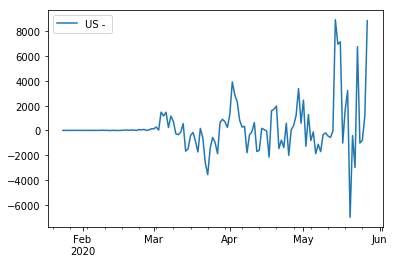

In [244]:
differential.rolling(3, win_type='gaussian').mean(std=diff_summary['std'][0]).plot()

In [245]:
type(diff_summary)

pandas.core.frame.DataFrame

In [246]:
type(diff_summary['std'])

pandas.core.series.Series

In [248]:
diff_summary.std

<bound method DataFrame.std of        count        mean          std      min    25%  50%     75%      max
US -   127.0  355.543307  5117.073767 -30821.0 -833.5  0.0  1196.0  24338.0>

In [249]:
type(diff_summary.std)

method

In [250]:
diff_summary.index

Index(['US - '], dtype='object')

In [251]:
diff_summary.columns

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [252]:
diff_summary.std.values

AttributeError: 'function' object has no attribute 'values'

In [254]:
diff_summary['std'].values

array([5117.07376658])